In [115]:
cd /Users/YINAN/Documents/Code/Pycharm/Sealion/

/Users/YINAN/Documents/Code/Pycharm/Sealion


In [139]:
from ast import literal_eval
import pandas as pd
import utils
import cv2
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import keras
import sklearn
%matplotlib inline

# Generate test patches

In [117]:
converters={"adult_males": literal_eval,
            "subadult_males": literal_eval,
            "adult_females": literal_eval,
            "juveniles": literal_eval,
            "pups": literal_eval,
            "total": literal_eval}

In [118]:
second_df = pd.read_csv('./test_coordinates.csv', converters=converters, index_col='index')

In [183]:
patch_path = '/Users/YINAN/Local/Sea-lions/Patches'
print('extracting patches for test')
second_sl_patches = utils.extract_patches_with_sealions(second_df)
second_bg_patches = utils.extract_patches_without_sealions(second_df, num_patches=5000)
second = second_sl_patches.copy()
second['backgrounds'] = second_bg_patches

for key in second:
    print(key, len(second[key]))

extracting patches for test
181 image completes, with total = 181
background 5000 patches completes,number = 5000
adult_males 1078
subadult_males 677
adult_females 7880
juveniles 4061
pups 3970
backgrounds 5000


In [186]:
for key in second:
    counter = 0
    path = patch_path + "/test2/" + key + '/'
    for patch in second[key]:
        cv2.imwrite(path+key+"@"+str(counter)+'.jpg', cv2.cvtColor(patch, cv2.COLOR_RGB2BGR))
        counter += 1
    print(key, "completes")



adult_males completes
subadult_males completes
adult_females completes
juveniles completes
pups completes
backgrounds completes


# Plot trained model

In [119]:
train_log_path = '/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/trainlog.log'
train_log = pd.read_csv(train_log_path)

In [120]:
train_acc = list(train_log['acc'])
valid_acc = list(train_log['val_acc'])

train_loss = list(train_log['loss'])
valid_loss = list(train_log['val_loss'])

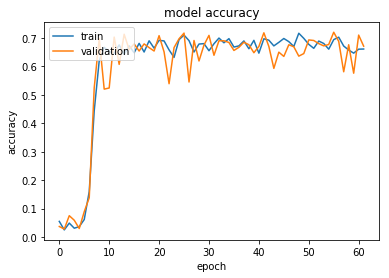

In [121]:
# Summarize history for accuracy
plt.plot(train_acc)
plt.plot(valid_acc)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

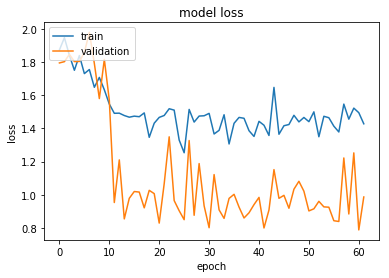

In [122]:
# Summarize history for loss
plt.plot(train_loss)
plt.plot(valid_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Evaluate model using test dataset

In [123]:
model_path = '/Users/YINAN/Documents/Code/Pycharm/Sealion/saved/checkpoint.hdf5'
model = keras.models.load_model(model_path)

In [137]:
test_datagen = ImageDataGenerator(
        rescale=1./255)

In [187]:
test_data_path = '/Users/YINAN/Local/Sea-lions/Patches/test2/'
test_generator = test_datagen.flow_from_directory(
        test_data_path,
        target_size=(96,96),
        batch_size=1)

Found 21989 images belonging to 6 classes.


In [189]:
model.evaluate_generator(test_generator, steps=1000)

[1.7984222702980042, 0.17699999999999999]